In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
import keras.utils
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from keras.optimizers import SGD
from keras.utils import np_utils

import keras 
from keras import applications
from tqdm import tqdm
import math
import tensorflow as tf

import copy


from keras.datasets import mnist


def fn(correct, predicted):
        return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                       logits=predicted/1)

size_var = 28
rows = 28
cols = 28
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()


model = Sequential()

model.add(Conv2D(32, 3, 3, input_shape=(1, 28, 28),  dim_ordering="th"))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
        
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
        
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation("softmax"))


batch_size = 128
num_epochs = 7
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
model.compile(loss=fn, optimizer=sgd, metrics=['accuracy'])
    
model.load_weights("cw-attacks-mnist.weights")

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1, 28, 28...)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launc

In [2]:
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import os
import cv2
import numpy as np
import keras 
from keras import applications
from SafeCV import *


def max_manip(p,e):
    w = 255-p
    if(p < w):
        return 255
    else:
        return 0

(x_train, y_train), (x_test, y_test) = mnist.load_data()

imnum = 2567


params_for_run = MCTS_Parameters(x_test[imnum], y_test[imnum], model, predshape=(1,1,28,28))
params_for_run.X_SHAPE = 28
params_for_run.Y_SHAPE = 28
params_for_run.small_image = True
params_for_run.verbose = True
params_for_run.MANIP = max_manip
params_for_run.VISIT_CONSTANT = 1
params_for_run.VISIT_CONSTANT = 6
params_for_run.simulations_cutoff = 100
params_for_run.backtracking_constant = 10

best_image, sev, prob, statistics = MCTS(params_for_run)

Exploring new keypoints on a new layer: 1 on node: 9
Starting DFMCS. Cuttoff: -1
Current Probability: 1.0 Current Class: 7 Manipulations: 84  

Adversarial Example Found
Current Probability: 1.0 Current Class: 8 Manipulations: 90  Backtracking
Backtracking Step L_0: 90 Probability: 1.0 Class: 7, progress: 80/90
 Done backtracking
Back propogating and restarting search. Current Severity: 96
Best severity: 96

Exploring new keypoints on an existing layer: 1 on node: 6
Starting DFMCS. Cuttoff: 96
Current Probability: 1.0 Current Class: 7 Manipulations: 120  Back propogating and restarting search. Current Severity: -1
Best severity: 96

Exploring new keypoints on an existing layer: 1 on node: 7
Starting DFMCS. Cuttoff: 96
Current Probability: 1.0 Current Class: 7 Manipulations: 66  

Adversarial Example Found
Current Probability: 1.0 Current Class: 3 Manipulations: 72 Backtracking
Backtracking Step L_0: 72 Probability: 1.0 Class: 7, progress: 60/72
 Done backtracking
Back propogating and r

Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 84  Back propogating and restarting search. Current Severity: -1
Best severity: 63

manipulating and continuing the search: 5
Exploring new keypoints on an existing layer: 2 on node: 4
Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 84  Back propogating and restarting search. Current Severity: -1
Best severity: 63

manipulating and continuing the search: 4
manipulating and continuing the search: 12
Exploring new keypoints on an existing layer: 3 on node: 5
Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 84  Back propogating and restarting search. Current Severity: -1
Best severity: 63

manipulating and continuing the search: 2
Exploring new keypoints on an existing layer: 2 on node: 1
Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 84  Back propogating and restarting search. Current Severity: 

manipulating and continuing the search: 11
Exploring new keypoints on an existing layer: 4 on node: 6
Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 60  

Adversarial Example Found
Current Probability: 1.0 Current Class: 3 Manipulations: 66  Backtracking
Backtracking Step L_0: 66 Probability: 1.0 Class: 7, progress: 60/66
 Done backtracking
Back propogating and restarting search. Current Severity: 90
Best severity: 63

Exploring new keypoints on an existing layer: 1 on node: 0
Starting DFMCS. Cuttoff: 63
Current Probability: 1.0 Current Class: 7 Manipulations: 54  

Adversarial Example Found
Current Probability: 1.0 Current Class: 3 Manipulations: 60 Backtracking
Backtracking Step L_0: 60 Probability: 1.0 Class: 7, progress: 50/60
 Done backtracking
Back propogating and restarting search. Current Severity: 66
Best severity: 63

manipulating and continuing the search: 6
Exploring new keypoints on an existing layer: 2 on node: 0
Starting DFMCS. Cutto

manipulating and continuing the search: 13
Exploring new keypoints on a new layer: 7 on node: 3
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 9
manipulating and continuing the search: 13
manipulating and continuing the search: 4
manipulating and continuing the search: 1
Exploring new keypoints on an existing layer: 5 on node: 2
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 6
manipulating and continuing the search: 8
manipulating and continuing the search: 13
manipulating and continuing the search: 5
manipulating and continuing the search: 6
Exploring new keypoints on an existing layer: 6 on node: 12
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class:

manipulating and continuing the search: 12
manipulating and continuing the search: 7
manipulating and continuing the search: 12
manipulating and continuing the search: 13
manipulating and continuing the search: 13
Exploring new keypoints on an existing layer: 7 on node: 9
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 10
manipulating and continuing the search: 5
manipulating and continuing the search: 10
manipulating and continuing the search: 3
manipulating and continuing the search: 6
Exploring new keypoints on an existing layer: 6 on node: 9
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 8
manipulating and continuing the search: 11
manipulating and continuing the s

Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 12
manipulating and continuing the search: 2
manipulating and continuing the search: 7
manipulating and continuing the search: 4
manipulating and continuing the search: 4
manipulating and continuing the search: 11
manipulating and continuing the search: 10
Exploring new keypoints on an existing layer: 8 on node: 10
Starting DFMCS. Cuttoff: 55
Current Probability: 1.0 Current Class: 7 Manipulations: 72  Back propogating and restarting search. Current Severity: -1
Best severity: 55

manipulating and continuing the search: 13
manipulating and continuing the search: 11
manipulating and continuing the search: 10
manipulating and continuing the search: 5
manipulating and continuing the search: 1
manipulating and continuing the search: 11
manipulating and continuing the search: 7
Explori

BEST ADVERSARIAL EXAMPLE:


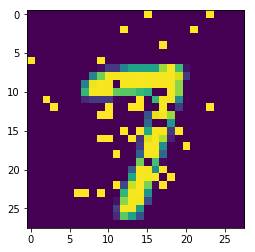

True class: 7; Predicted as: 3 with confidence: 1.0; After 55 manipulations
MCTS Run analysis:


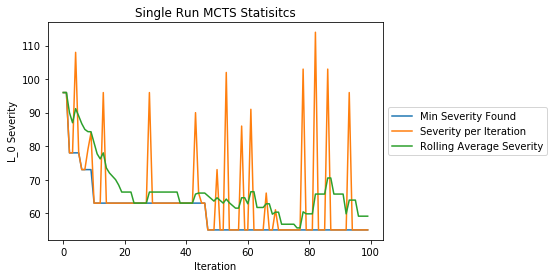

In [3]:
print("BEST ADVERSARIAL EXAMPLE:")
plt.imshow(best_image)
plt.show()
prob = model.predict(best_image.reshape(1,1,28,28))
new_class = np.argmax(prob[0])
new_prob = prob[0][np.argmax(prob)]
print("True class: %s; Predicted as: %s with confidence: %s; After %s manipulations"%(y_test[imnum], new_class, new_prob, sev ))
plt.clf()
print("MCTS Run analysis:")
a, = plt.plot(statistics[0], label="Min Severity Found")
b, = plt.plot(statistics[1], label="Severity per Iteration")
c, = plt.plot(statistics[2], label="Rolling Average Severity")
plt.legend(handles=[a,b,c], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Single Run MCTS Statisitcs")
plt.xlabel("Iteration")
plt.ylabel("L_0 Severity")
plt.show()